In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import yellowbrick
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

/Users/megs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')
#! pip install jupyterthemes -U
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme



In [3]:
set_nb_theme("monokai")

Create Pre-defined function for generating model report and plotting auc-roc-curve

In [4]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = ", accuracy_score(y_actual, y_predicted))
    print("Precision = ", precision_score(y_actual, y_predicted))
    print("Recall = ", recall_score(y_actual, y_predicted))
    print("F1 Score = ", f1_score(y_actual, y_predicted))
    pass

In [5]:
#Read given train.csv file

train_df = pd.read_csv("data/train.csv")
train_df.head(5)



,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


In [6]:
test_df = pd.read_csv("data/test.csv")
test_df.head(5)

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [7]:
train_df.isnull().sum().max()

269

In [8]:
train_df.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

In [9]:
print('class: 0 is', round(train_df['outcome'].value_counts()[0]/len(train_df) * 100,2), ' % of the given dataset')
print('class: 1 is', round(train_df['outcome'].value_counts()[1]/len(train_df) * 100,2), ' % of the given dataset')

class: 0 is 90.18  % of the given dataset
class: 1 is 9.82  % of the given dataset


Text(0.5, 1.0, 'Class Distributions \n (0: Class 0 || 1: Class 1)')

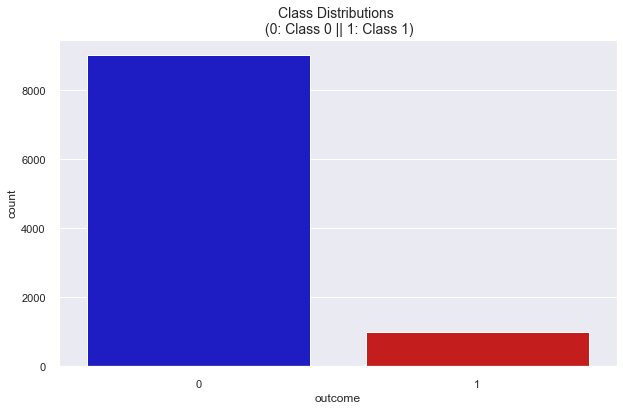

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]

sns.countplot('outcome', data=train_df, palette=colors)
plt.title('Class Distributions \n (0: Class 0 || 1: Class 1)', fontsize=14)

In [11]:
train_df = train_df.dropna(subset=['gender'])

Text(0.5, 1.0, 'Class Distributions \n (0: Class 0 || 1: Class 1)')

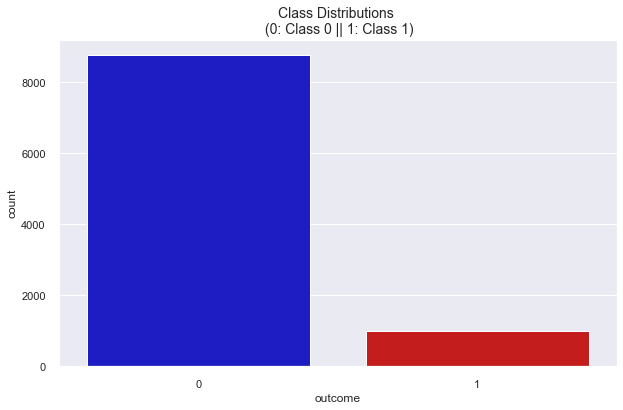

In [12]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('outcome', data=train_df, palette=colors)
plt.title('Class Distributions \n (0: Class 0 || 1: Class 1)', fontsize=14)

In [13]:
#divide the training data into training and validation
from sklearn.model_selection import train_test_split
X = train_df.drop('outcome', axis=1)
y = train_df['outcome']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)



In [14]:
X_train

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
3657,45,0.004550,Android,F,0,46800,2,1,8
4990,59,0.004221,laptop,M,0,93232,1,2,2
573,42,0.003764,desktop,M,1,50932,2,1,8
908,39,0.005135,iPhone,M,1,39431,1,1,6
7761,46,0.004626,Android,F,1,75183,1,2,14
...,...,...,...,...,...,...,...,...,...
8108,41,0.005732,iPhone,M,0,56892,1,1,1
9485,59,0.006580,iPhone,F,0,59718,2,1,21
4985,48,0.004395,other,M,1,52873,2,2,6
3345,60,0.006241,iPhone,F,0,95097,2,1,12


In [15]:
#concatenate train df and validation df 
new_train_df = pd.concat([X_train, y_train], axis=1)
new_train_df

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
3657,45,0.004550,Android,F,0,46800,2,1,8,0
4990,59,0.004221,laptop,M,0,93232,1,2,2,0
573,42,0.003764,desktop,M,1,50932,2,1,8,0
908,39,0.005135,iPhone,M,1,39431,1,1,6,0
7761,46,0.004626,Android,F,1,75183,1,2,14,0
...,...,...,...,...,...,...,...,...,...,...
8108,41,0.005732,iPhone,M,0,56892,1,1,1,1
9485,59,0.006580,iPhone,F,0,59718,2,1,21,0
4985,48,0.004395,other,M,1,52873,2,2,6,0
3345,60,0.006241,iPhone,F,0,95097,2,1,12,0


In [16]:
rslt_df_0 = new_train_df.loc[new_train_df['outcome'] == 0]
rslt_df_0.count()



age                           6132
cost_of_ad                    6132
device_type                   6132
gender                        6132
in_initial_launch_location    6132
income                        6132
n_drivers                     6132
n_vehicles                    6132
prior_ins_tenure              6132
outcome                       6132
dtype: int64

In [17]:
rslt_df_1 = new_train_df.loc[new_train_df['outcome'] == 1]
rslt_df_1.count()

age                           679
cost_of_ad                    679
device_type                   679
gender                        679
in_initial_launch_location    679
income                        679
n_drivers                     679
n_vehicles                    679
prior_ins_tenure              679
outcome                       679
dtype: int64

In [18]:
#one-hot encoding

In [19]:
#categorical data
categorical_cols = ['device_type', 'gender'] 
#import pandas as pd
new_train_df = pd.get_dummies(new_train_df, columns = categorical_cols)
new_train_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
3657,45,0.004550,0,46800,2,1,8,0,1,0,0,0,0,1,0
4990,59,0.004221,0,93232,1,2,2,0,0,0,0,1,0,0,1
573,42,0.003764,1,50932,2,1,8,0,0,1,0,0,0,0,1
908,39,0.005135,1,39431,1,1,6,0,0,0,1,0,0,0,1
7761,46,0.004626,1,75183,1,2,14,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,41,0.005732,0,56892,1,1,1,1,0,0,1,0,0,0,1
9485,59,0.006580,0,59718,2,1,21,0,0,0,1,0,0,1,0
4985,48,0.004395,1,52873,2,2,6,0,0,0,0,0,1,0,1
3345,60,0.006241,0,95097,2,1,12,0,0,0,1,0,0,1,0


In [20]:
cols = list(new_train_df.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('outcome')) #Remove outcome
new_train_df = new_train_df[cols+['outcome']] 
new_train_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M,outcome
3657,45,0.004550,0,46800,2,1,8,1,0,0,0,0,1,0,0
4990,59,0.004221,0,93232,1,2,2,0,0,0,1,0,0,1,0
573,42,0.003764,1,50932,2,1,8,0,1,0,0,0,0,1,0
908,39,0.005135,1,39431,1,1,6,0,0,1,0,0,0,1,0
7761,46,0.004626,1,75183,1,2,14,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,41,0.005732,0,56892,1,1,1,0,0,1,0,0,0,1,1
9485,59,0.006580,0,59718,2,1,21,0,0,1,0,0,1,0,0
4985,48,0.004395,1,52873,2,2,6,0,0,0,0,1,0,1,0
3345,60,0.006241,0,95097,2,1,12,0,0,1,0,0,1,0,0


In [21]:
Train_X = new_train_df.iloc[:,0:14];
Train_y = new_train_df.iloc[ :, -1:];

Train_X

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
3657,45,0.004550,0,46800,2,1,8,1,0,0,0,0,1,0
4990,59,0.004221,0,93232,1,2,2,0,0,0,1,0,0,1
573,42,0.003764,1,50932,2,1,8,0,1,0,0,0,0,1
908,39,0.005135,1,39431,1,1,6,0,0,1,0,0,0,1
7761,46,0.004626,1,75183,1,2,14,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8108,41,0.005732,0,56892,1,1,1,0,0,1,0,0,0,1
9485,59,0.006580,0,59718,2,1,21,0,0,1,0,0,1,0
4985,48,0.004395,1,52873,2,2,6,0,0,0,0,1,0,1
3345,60,0.006241,0,95097,2,1,12,0,0,1,0,0,1,0


In [22]:
Train_y

,outcome
3657,0
4990,0
573,0
908,0
7761,0
...,...
8108,1
9485,0
4985,0
3345,0


# Validation one-hot encoding

In [23]:
val_df = pd.concat([X_val, y_val], axis=1)
val_df

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
3951,48,0.004595,desktop,F,1,62494,1,3,4,0
6945,28,0.004864,other,F,0,67434,2,1,0,0
8596,54,0.003753,laptop,M,0,90458,2,2,8,0
2252,31,0.004881,iPhone,M,1,56422,2,3,5,0
9284,23,0.004815,desktop,F,1,61356,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,desktop,M,1,55102,2,1,5,1
8740,38,0.005378,desktop,F,0,40183,2,2,4,1
5439,31,0.004465,laptop,F,1,31874,2,1,6,0
5210,31,0.004597,other,F,1,32515,1,1,7,0


In [24]:
categorical_cols = ['device_type', 'gender'] 

#import pandas as pd
encoded_val_df = pd.get_dummies(val_df, columns = categorical_cols)
encoded_val_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
3951,48,0.004595,1,62494,1,3,4,0,0,1,0,0,0,1,0
6945,28,0.004864,0,67434,2,1,0,0,0,0,0,0,1,1,0
8596,54,0.003753,0,90458,2,2,8,0,0,0,0,1,0,0,1
2252,31,0.004881,1,56422,2,3,5,0,0,0,1,0,0,0,1
9284,23,0.004815,1,61356,2,2,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,1,55102,2,1,5,1,0,1,0,0,0,0,1
8740,38,0.005378,0,40183,2,2,4,1,0,1,0,0,0,1,0
5439,31,0.004465,1,31874,2,1,6,0,0,0,0,1,0,1,0
5210,31,0.004597,1,32515,1,1,7,0,0,0,0,0,1,1,0


In [25]:
cols_valdf = list(encoded_val_df.columns.values) #Make a list of all of the columns in the df
cols_valdf.pop(cols_valdf.index('outcome')) #Remove outcome
final_val_df = encoded_val_df[cols_valdf+['outcome']] 
final_val_df

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M,outcome
3951,48,0.004595,1,62494,1,3,4,0,1,0,0,0,1,0,0
6945,28,0.004864,0,67434,2,1,0,0,0,0,0,1,1,0,0
8596,54,0.003753,0,90458,2,2,8,0,0,0,1,0,0,1,0
2252,31,0.004881,1,56422,2,3,5,0,0,1,0,0,0,1,0
9284,23,0.004815,1,61356,2,2,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,1,55102,2,1,5,0,1,0,0,0,0,1,1
8740,38,0.005378,0,40183,2,2,4,0,1,0,0,0,1,0,1
5439,31,0.004465,1,31874,2,1,6,0,0,0,1,0,1,0,0
5210,31,0.004597,1,32515,1,1,7,0,0,0,0,1,1,0,0


In [26]:
final_X_val = final_val_df.iloc [:,0:14]

final_y_val = final_val_df.iloc [ :, -1:]

In [27]:
final_X_val

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
3951,48,0.004595,1,62494,1,3,4,0,1,0,0,0,1,0
6945,28,0.004864,0,67434,2,1,0,0,0,0,0,1,1,0
8596,54,0.003753,0,90458,2,2,8,0,0,0,1,0,0,1
2252,31,0.004881,1,56422,2,3,5,0,0,1,0,0,0,1
9284,23,0.004815,1,61356,2,2,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4076,43,0.004301,1,55102,2,1,5,0,1,0,0,0,0,1
8740,38,0.005378,0,40183,2,2,4,0,1,0,0,0,1,0
5439,31,0.004465,1,31874,2,1,6,0,0,0,1,0,1,0
5210,31,0.004597,1,32515,1,1,7,0,0,0,0,1,1,0


In [28]:
final_y_val

,outcome
3951,0
6945,0
8596,0
2252,0
9284,1
...,...
4076,1
8740,1
5439,0
5210,0


# Optimize for sensitivity using GridSearchCV with the scoring argument (Fine Tuning Random Forest Classifier to achieve stable AUC-ROC curve)

Using GridSearchCV to tune your model by searching for the best hyperparameters and keeping the classifier with the highest recall score

In [29]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [30]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [5, 9, 12, 14]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [31]:

def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(Train_X.values, Train_y.values)

    # make the predictions
    y_pred = grid_search.predict(final_X_val.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(final_y_val, y_pred),
                  columns=['neg', 'pos'], index=['pred_neg', 'pred_pos']))    
                 #columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [32]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_n_estimators']].round(3).head()

Best params for precision_score
{'max_depth': 5, 'max_features': 9, 'min_samples_split': 10, 'n_estimators': 300}

Confusion matrix of Random Forest optimized for precision_score on the test data:
           neg  pos
pred_neg  2618    8
pred_pos   268   26


,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
35,0.738,0.116,0.908,5,9,10,300
33,0.737,0.121,0.908,5,9,5,300
31,0.729,0.118,0.908,5,9,3,300
34,0.724,0.119,0.908,5,9,10,100
32,0.720,0.102,0.906,5,9,5,100


In [33]:
y_scores = grid_search_clf.predict_proba(final_X_val)[:, 1]
# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)

In [322]:
p, r, thresholds = precision_recall_curve(final_y_val, y_scores)

In [323]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(final_y_val, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    

In [324]:
precision_recall_threshold(p, r, thresholds, 0.259)

     pred_neg  pred_pos
neg      2441       185
pos       184       110


In [325]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

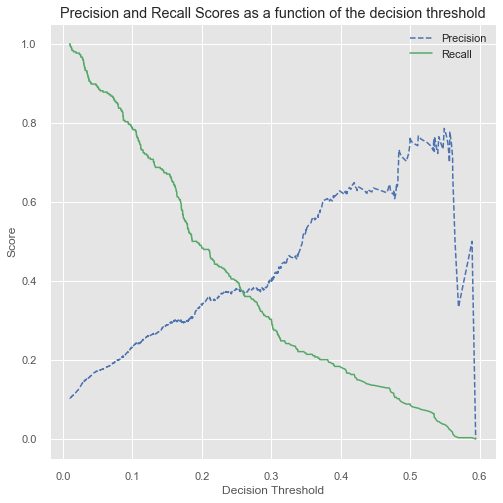

In [326]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [327]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

In [328]:
#fpr, tpr, auc_thresholds = roc_curve(final_y_val, y_scores)
#print(auc(fpr, tpr)) # AUC of ROC
#plot_roc_curve(fpr, tpr, 'recall_optimized')

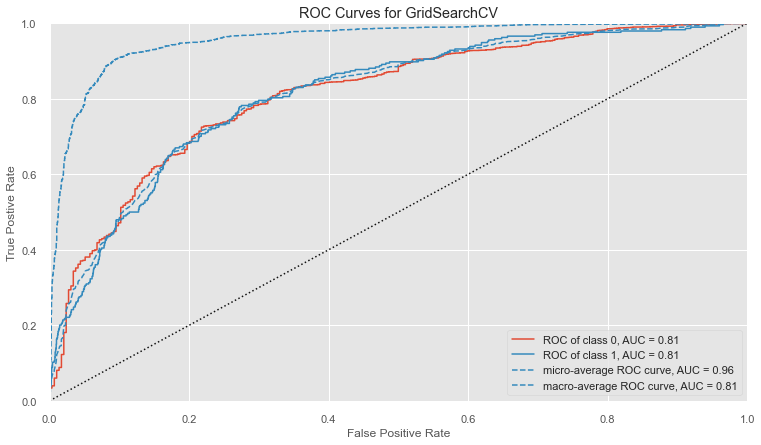

In [329]:
outcome = ['0','1']
rocauc = ROCAUC(grid_search_clf, size=(900, 500), classes=outcome)

rocauc.score(final_X_val,final_y_val)  
r = rocauc.poof()

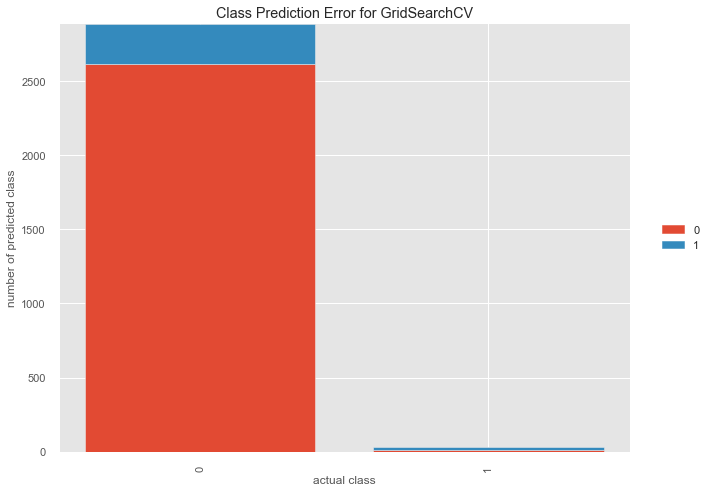

In [330]:
final_y_val=final_val_df['outcome']
outcome = ['0', '1']
#LogisticRegression(random_state=42)
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    grid_search_clf,size=(800,500), classes=outcome
)

# Fit the training data to the visualizer
visualizer.fit(Train_X, Train_y)

# Evaluate the model on the test data
visualizer.score(final_X_val, final_y_val)

# Draw visualization
visualizer.show()